<br><br><center><h1 style="font-size:4em;color:#2467C0">Week 1: Soccer Data Analysis</h1></center>
<br>
<table>
<col width="550">
<col width="450">
<tr>
<td><img src="https://images.pexels.com/photos/1667583/pexels-photo-1667583.jpeg?auto=compress&cs=tinysrgb&dpr=2&h=750&w=1260" align="middle" style="width:550px;height:360px;"/></td>
<td>
Esta semana, vamos usar um dataset aberto do site popular<a href="https://www.kaggle.com"> Kaggle</a>. Este <a href="https://www.kaggle.com/hugomathien/soccer">conjunto de dados do Futebol Europeu</a> tem mais de 25 mil jogos e mais de 10 mil jogadores profissionais das temporadas entre 2008 e 2016. 
<br>
<br>
Embora não entraremos em detalhes para o nosso exemplo, o conjunto de dados ainda tem atributos sobre atualizações semanais do jogo, escalação de equipe e eventos de jogo detalhados.
<br>
<br>
O objetivo do notebook da análise é caminhar de ponta a ponta no processo de analise de um dataset e introduzir o que vamos cobrir neste curso. Nosso processo analítico inclui alguns passos para exploração e limpeza do dataset, alguns passos para predição da performance dos jogadores usando estatística básica e alguns passos para agrupar tipos semelhantes usando machine learning.
<br>
<br>
Vamos iniciar nossa Jornada em Python para Data Science!
</td>
</tr>
</table>

## Iniciando
<br> Para começar, vamos precisar:
<ol>
<li>Baixar os dados de: <a href="https://www.kaggle.com/hugomathien/soccer">https://www.kaggle.com/hugomathien/soccer</a></li>
<li>Extrair o arquivo .zip</li>
    <li>Mover o arquivo extraído 'database.sqlite' para sua pasta week 1r</li>
</ol>

## Importando Bibliotecas
<br> Vamos começar importando as bibliotecas Python que vamos usar ao longo deste análise. Estas bibliotecas incluem:
<ul>
<li><b>sqllite3</b> para interagir com o banco de dados relacional local; and</li>
<li><b>pandas</b> and <b>numpy</b> para ingestão e manipulação.</li>
<li><b>matplotlib</b> para visualização dos dados</li>
<li>specific methods from <b>sklearn</b> para Machine Learning 
<li><b>customplot</b>, que contém funções customizadas que nós escrevemos para este notebook</li>

</ul>

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from customplot import *

#### Ingestão de dados

Agora, nós precisamos ler os dados usando os comandos abaixo. 

<b>Nota:</b> Tenha certeza que você rodou a célula acima (shift + enter) que importa o que vamos precisar, antes de rodar a célula abaixo.

<b>df</b> é uma variável apontada para um dataframe do pandas. Nós vamos aprender sobre na próxima semana.

In [2]:
# Crie sua conexão.
cnx = sqlite3.connect('database.sqlite')
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

<h1 style="font-size:2em;color:#2467C0">Explorando os dados</h1>

Vamos começar nossa exploração dos dados gerando simples estatísticas dos dados. 
<br><br> 
Vamos olhar para as colunas de dados usando um atributo do pandas chamado "columns".

In [3]:
df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

Agora vamos mostrar estatísticas simples do nosso conjunto de dados. Você precisará rodar cada celula para ter certeza de visualizar as saídas.

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,183978.0,91989.500000,53110.018250,1.0,45995.25,91989.5,137983.75,183978.0
player_fifa_api_id,183978.0,165671.524291,53851.094769,2.0,155798.00,183488.0,199848.00,234141.0
player_api_id,183978.0,135900.617324,136927.840510,2625.0,34763.00,77741.0,191080.00,750584.0
overall_rating,183142.0,68.600015,7.041139,33.0,64.00,69.0,73.00,94.0
potential,183142.0,73.460353,6.592271,39.0,69.00,74.0,78.00,97.0
crossing,183142.0,55.086883,17.242135,1.0,45.00,59.0,68.00,95.0
finishing,183142.0,49.921078,19.038705,1.0,34.00,53.0,65.00,97.0
heading_accuracy,183142.0,57.266023,16.488905,1.0,49.00,60.0,68.00,98.0
short_passing,183142.0,62.429672,14.194068,3.0,57.00,65.0,72.00,97.0
volleys,181265.0,49.468436,18.256618,1.0,35.00,52.0,64.00,93.0


<h1 style="font-size:2em;color:#2467C0">Limpeza dos dados: Lidando com Dados Faltantes</h1>
Dados reais nunca estão limpos. Nós precisamos garantir que nossa limpeza, seja convertendo ou nos livrando de dados nulos ou ausentes.<br>
A próxima célula de código nos mostra se alguma das 183978 linhas tem valores nulos em uma das 42 colunas.

In [5]:
# Existe alguma linha com valores Nulos?
df.isnull().any().any(), df.shape

(True, (183978, 42))

Agora vamos tentar encontrar quantos dados em cada coluna são nulos.

In [6]:
df.isnull().sum(axis=0)

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

## Ajustando valores nulos deletando-os

Nas próximas duas linhas, nos vamos largar os valores nulos percorrendo cada linha.

In [7]:
# Ajuste de valores nulos

# Pegue o valor inicial da quantidade de linhas antes de 
rows = df.shape[0]

# Largue as linhas com valores nulos
df = df.dropna()

Agora se nós checarmos os valores nulos e números de lihas, nós veremos que não existem valores nulos e o número de linhas diminuiu em conformidade com nossa ação anterior.

In [8]:
# Verifique se todos os nulos saíram do dataset?
print('Quantidade de linhas anterior: ', rows)
df.isnull().any().any(), df.shape

Quantidade de linhas anterior:  183978


(False, (180354, 42))

Para encontrar exatamente quantas linhas nós removemos, precisamos subtrair o número de linhas atual do número de linhas antes de remover os valores nulos.

In [9]:
# Quantas linhas com valores nulos foram removidas?

rows - df.shape[0]

3624

In [10]:
# Uma amostra do nosso dataset
df.head().transpose()

,0,1,2,3,4
id,1,2,3,4,5
player_fifa_api_id,218353,218353,218353,218353,218353
player_api_id,505942,505942,505942,505942,505942
date,2016-02-18 00:00:00,2015-11-19 00:00:00,2015-09-21 00:00:00,2015-03-20 00:00:00,2007-02-22 00:00:00
overall_rating,67,67,62,61,61
potential,71,71,66,65,65
preferred_foot,right,right,right,right,right
attacking_work_rate,medium,medium,medium,medium,medium
defensive_work_rate,medium,medium,medium,medium,medium
crossing,49,49,49,48,48


Nossa tabela de dados tem muitas linhas, como você pode ver. Nós podemos apenas olhar algumas linhas uma vez. Em vez de olhar as mesmas 10 linhas do topo todas as vezes, nós misturamos, então vamos ver diferentes exemplos de linhas no topo, de forma aleatória. Desta forma, nós garantimos que os dados não estão em uma ordem particular quando tentamos pegar uma amostra (como pegar as primeiras ou ultimas linhas) porque misturamos as linhas de forma aleatória.

In [11]:
# Misturamos as linhas do dataset então nós pegaremos exemplos distribuidos quando mostrar o topo das linhas.

df = df.reindex(np.random.permutation(df.index))

In [12]:
# Vamos verificar se mudou o head?
df.head().transpose()

,114805,13821,126260,131094,94996
id,114806,13822,126261,131095,94997
player_fifa_api_id,684,134963,209662,193714,216266
player_api_id,30633,33733,179218,157288,469804
date,2013-06-14 00:00:00,2011-08-30 00:00:00,2013-10-25 00:00:00,2014-03-07 00:00:00,2014-09-18 00:00:00
overall_rating,79,76,65,75,63
potential,79,76,70,76,77
preferred_foot,right,right,right,left,right
attacking_work_rate,medium,medium,high,medium,medium
defensive_work_rate,medium,medium,medium,high,medium
crossing,12,80,70,66,64


<h1 style="font-size:2em;color:#2467C0">Previsão: 'overall_rating' de um jogador</h1>
Agora que nosso passo de limpar o dataset esta razoavelmente completo e podemos confiar e entender mais os dados, nós começaremos mergulhando ainda mais no dataset. 

### Vamos dar uma olhada em algumas linhas.

Nós usamos a função head() para essa tarefa, iso nos dá todas as colunas de todas as linhas do top.

In [13]:
df.head(5)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
114805,114806,684,30633,2013-06-14 00:00:00,79.0,79.0,right,medium,medium,12.0,...,34.0,40.0,16.0,18.0,19.0,75.0,81.0,69.0,81.0,79.0
13821,13822,134963,33733,2011-08-30 00:00:00,76.0,76.0,right,medium,medium,80.0,...,67.0,65.0,77.0,76.0,78.0,6.0,14.0,9.0,7.0,8.0
126260,126261,209662,179218,2013-10-25 00:00:00,65.0,70.0,right,high,medium,70.0,...,46.0,59.0,25.0,21.0,22.0,11.0,15.0,14.0,8.0,10.0
131094,131095,193714,157288,2014-03-07 00:00:00,75.0,76.0,left,medium,high,66.0,...,55.0,36.0,75.0,78.0,75.0,9.0,13.0,6.0,13.0,9.0
94996,94997,216266,469804,2014-09-18 00:00:00,63.0,77.0,right,medium,medium,64.0,...,38.0,42.0,67.0,62.0,62.0,8.0,14.0,10.0,5.0,9.0


Na maior parte do tempo, nós apenas estamos interessados em plotar algumas colunas. Neste caso, nós podemos usar a opção de seleção de colunas do pandas como mostrado abaixo. Por favor ignore a primeira coluna na saída da célula abaixo. É o identificador exclusivo que age como index para os dados.<br><br>
<b>Nota:</b> A partir deste ponto, nós vamos começar nos referindo as colunas como 'features' na nossa descrição.

In [14]:
df[:10][['penalties', 'overall_rating']]

,penalties,overall_rating
114805,40.0,79.0
13821,65.0,76.0
126260,59.0,65.0
131094,36.0,75.0
94996,42.0,63.0
137653,66.0,68.0
55531,75.0,74.0
182928,21.0,72.0
110378,67.0,76.0
129662,72.0,73.0


## Análise de correlação de Features 
Vamos checar se 'penalties' está correlacionado a 'overall_rating'. Nós usaremos uma operação de seleção semelhante, mas desta vez para todas as linhas e dentro da função de correlação.

# Eles estão correlacionados (usando o coeficiente de correlação de Pearson)?

In [15]:
df['overall_rating'].corr(df['penalties'])

0.3927151079111883

Vemos que o coeficiente de correlação de Pearson para essas duas colunas é de 0,39.<br><br>
Pearson vai de -1 a +1. Um valor de 0 diria que não há correlação, então não devemos nos preocupar em olhar para esse atributo. Um valor de 0,39 mostra alguma correlação, embora possa ser mais forte.<br><br>
Pelo menos, temos esses atributos que estão ligeiramente correlacionados. Isso nos dá esperança de que possamos construir um preditor significativo usando esses recursos correlacionados "fracamente".<br><br>
Agora, vamos criar uma lista das features que nós gostariamos de iterar para a mesma operação.

## Crie uma lista de potenciais features que você quer medir a correlação

In [16]:
potentialFeatures = ['acceleration', 'curve', 'free_kick_accuracy', 'ball_control', 'shot_power', 'stamina']

O for loop abaixo mostra na tela os coeficientes de correlação de 'overall_rating' de um jogador com cada feature que nós adicionamos a lista potencial acima.

In [17]:
# Verifique como as features são correlacionadas com overall_rating
for f in potentialFeatures:
    cor = df['overall_rating'].corr(df[f])
    print(f'{f}: {cor:.6f}')

acceleration: 0.243998
curve: 0.357566
free_kick_accuracy: 0.349800
ball_control: 0.443991
shot_power: 0.428053
stamina: 0.325606


## Quais features tem as maiores correlações com overall_rating?

Olhando para os valores mostrados na célular anterior, notamos que são duas features "ball_control" (0.44) e "shot_power" (0.43). Então estas duas features parecem ter maior correlação com overall_rating.


<h1 style="font-size:2em;color:#2467C0">Visualização de Dados:</h1>
Agora nos vamos começar a plotar os coeficientes de correlação para cada feature com overall_rating. Nós começamos selecionando as colunas e criando uma lista com com os coeficientes de correlação, chamado "correlation".

In [18]:
cols = ['potential',  'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes']

In [19]:
# Crie uma lista contendo os coeficientes de correlação de Pearson entre overall_rating com cada coluna em cols
correlations = [ df['overall_rating'].corr(df[f]) for f in cols ]

In [20]:
len(cols), len(correlations)

(34, 34)

Com o comando acima, garantimos que o número de features selecionadas e os cálculos de correlação são os mesmos, neste caso, ambos tem 34 valores. As próximas duas células mostram algumas linhas de código que usa o funções do pandas para criar gráficos 2D desses valores de correlação e nome das colunas.

In [26]:
# Crie uma função para plotar um dataframe com as colunas em string e valores numericos

def plot_dataframe(df, y_label):  
    color='coral'
    fig = plt.gcf()
    fig.set_size_inches(20, 12)
    plt.ylabel(y_label)

    ax = df.correlation.plot(linewidth=3.3, color=color)
    ax.set_xticks(df.index)
    ax.set_xticklabels(df.attributes, rotation=75)
    plt.show()

In [27]:
# Crie um dataframe usando cols e correlations

df2 = pd.DataFrame({'attributes': cols, 'correlation': correlations})

In [28]:
df2.sort_values('correlation', ascending=False)

,attributes,correlation
14,reactions,0.771856
0,potential,0.765435
4,short_passing,0.458243
10,ball_control,0.443991
9,long_passing,0.434525
24,vision,0.431493
16,shot_power,0.428053
25,penalties,0.392715
20,long_shots,0.392668
23,positioning,0.368978


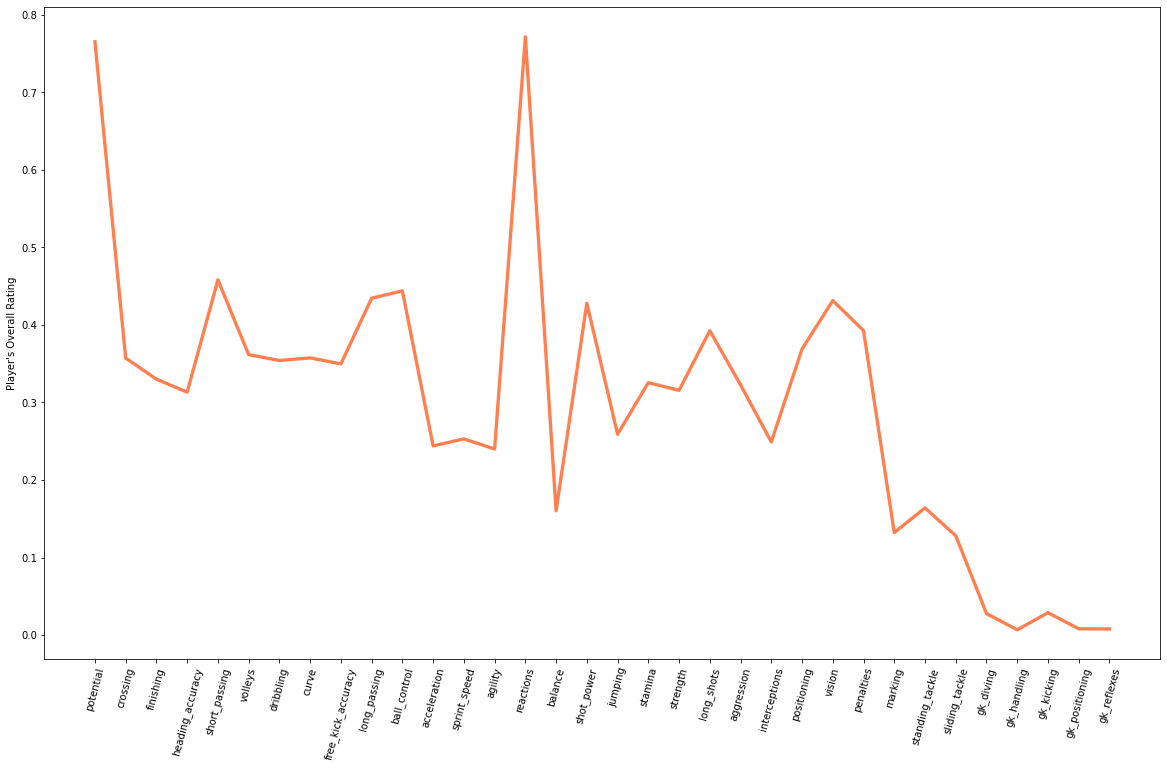

In [29]:
# Vamos plotar o dataframe acima usando a função que criamos
plot_dataframe(df2, 'Player\'s Overall Rating')

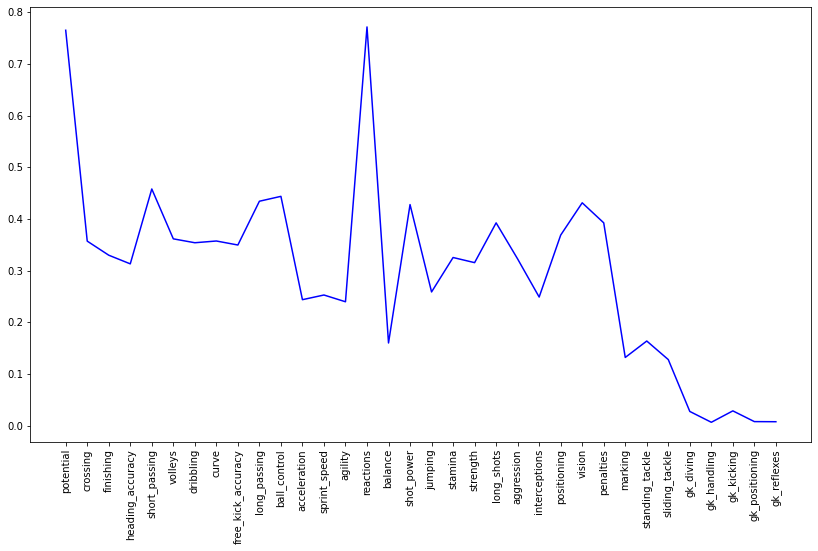

In [64]:
plt.figure(figsize=(14,8))
ax = df2.correlation.plot(color='blue')
ax.set_xticks(df2.index)
ax.set_xticklabels(df2.attributes, rotation=90)
plt.show()


<h1 style="font-size:1.5em;color:#FB41C4">Analisando os resultados</h1>

Agora é hora para analisar o que plotamos. Suponha que você tem que prever uma avaliação geral dos jogadores. Quais os cinco atributos você pediria?

<br><br>
<b>Dica:</b> Quais as 5 features com maiores coeficientes de correlação?

In [65]:
df2.sort_values('correlation', ascending=False)[0:5]

,attributes,correlation
14,reactions,0.771856
0,potential,0.765435
4,short_passing,0.458243
10,ball_control,0.443991
9,long_passing,0.434525


<h1 style="font-size:2em;color:#2467C0">Agrupando jogadores em grupos semelhantes</h1>

Até agora, nós usamos estatísticas básicas e coeficiente de correlação para começar a formar uma opinião, mas nós podemos fazer melhor? Se nós pegássemos algumas features e começar olhando para cada jogador usando estas features? Nos podemos agrupar os jogadores semelhantes baseado nessas features? Vamos ver como poderíamos fazer isso.

<b>Nota:</b> Geralmente, alguém com domínio do conhecimento precisa definir quais as features. Nós poderíamos também ter selecionado algumas dessas features pelos maiores coeficientes de correlação com overall_rating. No entanto, não garante os melhores resultados sempre, pois não temos certeza se as 5 maiores features de correlação são independentes.<br>
Por exemplo, se 4 das 5 features dependem de 1 recurso restante, pegar todos os 5 não nos dá novas informações.

## Selecione Features para agrupar os jogadores

In [66]:
# Defina as features que você quer usar para agrupar os jogadores

select5features = ['gk_kicking', 'potential', 'marking', 'interceptions', 'standing_tackle']
select5features

['gk_kicking', 'potential', 'marking', 'interceptions', 'standing_tackle']

In [67]:
# Crie um novo dataframe com as features que você acabou de definir

df_select = df[select5features].copy(deep=True)

In [68]:
df_select.head()

,gk_kicking,potential,marking,interceptions,standing_tackle
114805,69.0,79.0,16.0,21.0,18.0
13821,9.0,76.0,77.0,76.0,76.0
126260,14.0,70.0,25.0,25.0,21.0
131094,6.0,76.0,75.0,78.0,78.0
94996,10.0,77.0,67.0,58.0,62.0


## Execute o KMeans Clustering

Agora nós usaremos um método de machine learning chamado KMeans para agrupar os valores (ou seja, features dosjogadores em `gk_kicking`, `potential`, `marking`, `interceptions`, and `standing_tackle`). Nós vamos pedir por 4 grupos (clusters). Nós vamos falar sobre clusterização Kmeans e outras ferramentas de machine learning na Semana 7, então não vamos discutir estes métodos aqui.

In [69]:
# Execute o dimensionamento no dataframe que contém os recursos

data = scale(df_select)

# Defina número de clusters
noOfClusters = 4

# Treine um modelo
model = KMeans(init='k-means++', n_clusters=noOfClusters, n_init=20).fit(data)

In [70]:
print(90*'_')
print("\nCount of players in each cluster")
print(90*'_')

pd.value_counts(model.labels_, sort=False)

__________________________________________________________________________________________

Count of players in each cluster
__________________________________________________________________________________________


0    50445
1    50238
2    23767
3    55904
dtype: int64

Se você encontrar um erro ao executar a célula abaixo, tenha certeza que você esta usando a última versão do `pandas` no seu computador (tente `!pip instal pandas` em uma célula). Você pode salvar e resetar seu notebook Jupyter e tentar novamente.

In [71]:
# Crie um dataframe composto para plotagem
# ... Use a função personalizada declarada em customplot.py (que importamos no início deste bloco de notas)

P = pd_centers(featuresUsed=select5features, centers=model.cluster_centers_)
P

,gk_kicking,potential,marking,interceptions,standing_tackle,prediction
0,-0.037596,0.705463,1.027777,0.982963,1.030252,0
1,-0.338663,-0.841883,0.548444,0.407648,0.550967,1
2,1.920891,0.036099,-1.113185,-0.655479,-1.202705,2
3,-0.476860,0.105960,-0.947811,-0.975022,-0.914309,3


<h1 style="font-size:2em;color:#2467C0">Visualização dos Clusters</h1>

Agora nós vamos temos 4 grupos (clusters) selecionados por nossas features, nós podemos tratá-los como perfis de grupos semelhantes dos jogadores. Nós podemos visualizar estes perfis plotando os centros de cada cluster, ou seja, os valores médios para cada feature no cluster. Nós usaremos matplotlib para esta visualização. Nós vamos aprender mais sobre matplotlib na semana 5.

In [72]:
# Para plotar os gráficos dentro do próprio notebook, nós usamos o seguinte comando

%matplotlib inline

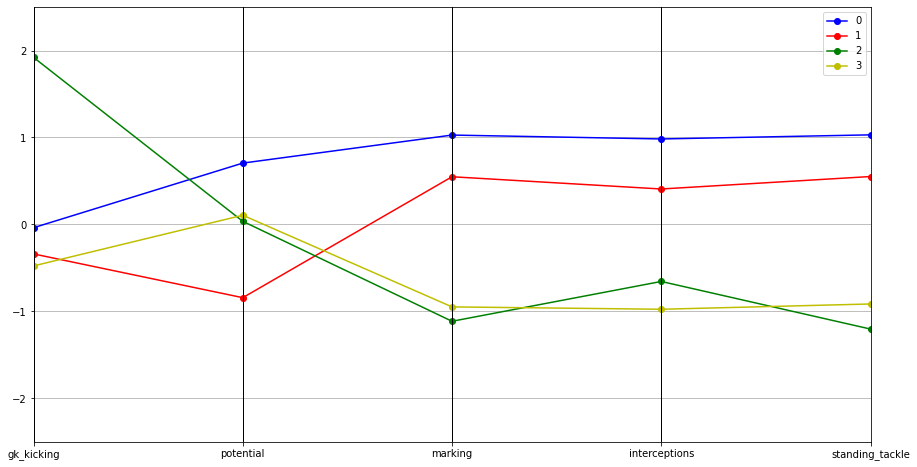

In [73]:
parallel_plot(P)

<h1 style="font-size:1.5em;color:#FB41C4">Analise das descobertas</h1>

### Você pode identificar os grupos para cada um dos itens abaixo?

<ul>
<li>Dois grupos são muito similares, exceto em `gk_kicking` - esses jogadores podem treinar uns aos outros em `gk_kicking`, onde eles são diferentes.
    <ul>
    <li>Grupo 2</li>
    <li>Grupo 3</li>
    </ul>
</li>
<li>Dois grupos são um tanto semelhantes entre si, exceto em potencial.
    <ul>
        <li>Grupo 0</li>
        <li>Grupo 1</li>
    </ul>
</li>
</ul>

<p>Me parece que o grupo 2 são jogadores </p>